In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  
pd.options.display.max_rows = 10

# Previously calculated Median Individual Income

In [4]:
incs = pd.read_csv('../input/indiIncomes.csv')
incs.set_index('Age', inplace = True)
incs = incs.iloc[:, 1:]
incs

,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,...,1974,1973,1972,1971,1970,1969,1968,1967,1966,1965
Age,,,,,,,,,,,,,,,,,,,,,
0,9451,8864,8819,8965,9370,8750,8518,8243,8181,7963,...,1858,1641,1515,1481,1403,1296,1143,0,0,0
1,9516,9225,9090,8700,9093,9137,8794,8564,8228,8181,...,1839,1657,1497,1444,1419,1296,1151,0,0,0
2,9416,9165,8888,8851,9733,9577,9090,8840,8539,8154,...,1921,1732,1635,1513,1393,1323,1178,0,0,0
3,9249,9337,8781,8755,9606,9444,9259,8888,8529,8250,...,1901,1762,1539,1456,1406,1296,1162,0,0,0
4,9349,9306,9259,9259,9374,9631,9137,9000,8556,8154,...,1889,1685,1580,1450,1403,1296,1155,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,0,0,0,...,2305,1564,1428,1358,1483,2425,420,1049,1044,1176
96,0,0,0,0,0,0,0,0,0,0,...,3701,3245,1899,1621,1522,1510,1344,808,1648,567
97,0,0,0,0,0,0,0,0,0,0,...,3297,1129,1173,888,1040,2178,400,2375,815,2411


# Formulate Annual Death Rates in the USA

### Direct from social security life tables
 https://www.ssa.gov/oact/HistEst/Death/2016/DeathProbabilities2016.html

In [66]:
prob_death_m = pd.read_excel('../input/DeathProbsMale.xlsx')
prob_death_m.set_index('Year', inplace = True)
prob_death_f = pd.read_excel('../input/DeathProbsFemale.xlsx')
prob_death_f.set_index('Year', inplace = True)

In [67]:
#Find average probabilities between males and females (weighted avg not necessary because both are based on 100,000 people)
prob_death = pd.DataFrame((prob_death_m.values + prob_death_f.values) / 2, columns = prob_death_m.columns, index = prob_death_m.index)

In [68]:
prob_death

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
Year,,,,,,,,,,,,,,,,,,,,,
1900,0.132825,0.037157,0.018697,0.013225,0.010554,0.007775,0.005600,0.004030,0.003052,0.002602,...,0.732874,0.769518,0.807994,0.848393,0.890813,0.935354,0.982121,1.000000,1.000000,1.000000
1901,0.116139,0.031715,0.015991,0.011319,0.009036,0.006814,0.005064,0.003782,0.002954,0.002533,...,0.726226,0.762537,0.800664,0.840697,0.882732,0.926869,0.973212,1.000000,1.000000,1.000000
1902,0.114092,0.030963,0.015614,0.011057,0.008827,0.006576,0.004808,0.003519,0.002697,0.002292,...,0.678666,0.712599,0.748229,0.785640,0.824922,0.866168,0.909477,0.954951,1.000000,1.000000
1903,0.109176,0.028838,0.014555,0.010312,0.008234,0.006333,0.004832,0.003722,0.002987,0.002588,...,0.714769,0.750508,0.788033,0.827435,0.868807,0.912247,0.957859,1.000000,1.000000,1.000000
1904,0.114355,0.029743,0.015009,0.010628,0.008486,0.006471,0.004898,0.003766,0.003061,0.002737,...,0.762898,0.801043,0.841095,0.883150,0.927308,0.973673,1.000000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009,0.006359,0.000410,0.000271,0.000209,0.000163,0.000147,0.000135,0.000126,0.000114,0.000102,...,0.556267,0.586762,0.618943,0.652902,0.688742,0.726563,0.766480,0.808608,0.851385,0.893954
2010,0.006121,0.000416,0.000259,0.000197,0.000152,0.000135,0.000124,0.000115,0.000104,0.000093,...,0.563308,0.594199,0.626799,0.661201,0.697508,0.735825,0.776263,0.818181,0.859090,0.902045
2011,0.006041,0.000413,0.000255,0.000196,0.000158,0.000142,0.000131,0.000121,0.000110,0.000097,...,0.568520,0.599716,0.632639,0.667383,0.704053,0.742753,0.781184,0.820243,0.861255,0.904318


In [70]:
prob_death = prob_death.iloc[65:, 0:100]
prob_death.index.rename('Age', inplace = True)
prob_death = prob_death.T
prob_death = prob_death[prob_death.columns[::-1]]

Subtract each value from one to get the probability of surviving one year at each age.

In [71]:
prob_death = prob_death.apply(lambda x: 1 - x)
prob_death

Age,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,...,1974,1973,1972,1971,1970,1969,1968,1967,1966,1965
0,0.994052,0.994031,0.993959,0.993879,0.993641,0.993432,0.993263,0.993298,0.993139,0.993217,...,0.983310,0.982414,0.981719,0.981105,0.979975,0.979163,0.978262,0.977691,0.976437,0.975568
1,0.999579,0.999589,0.999587,0.999584,0.999590,0.999540,0.999536,0.999551,0.999531,0.999513,...,0.998898,0.998823,0.998830,0.998814,0.998754,0.998694,0.998593,0.998610,0.998451,0.998494
2,0.999744,0.999734,0.999745,0.999741,0.999729,0.999721,0.999714,0.999702,0.999692,0.999702,...,0.999274,0.999198,0.999197,0.999198,0.999180,0.999129,0.999105,0.999099,0.999064,0.999043
3,0.999815,0.999803,0.999804,0.999803,0.999791,0.999782,0.999784,0.999786,0.999782,0.999779,...,0.999389,0.999397,0.999357,0.999350,0.999320,0.999305,0.999309,0.999317,0.999272,0.999278
4,0.999846,0.999838,0.999842,0.999848,0.999837,0.999829,0.999826,0.999823,0.999821,0.999815,...,0.999515,0.999465,0.999483,0.999445,0.999438,0.999405,0.999423,0.999413,0.999379,0.999375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.759458,0.759692,0.756355,0.758211,0.760935,0.748978,0.753355,0.747584,0.740175,0.747687,...,0.747328,0.734692,0.736806,0.737123,0.738896,0.725691,0.712213,0.723815,0.714530,0.712188
96,0.740216,0.740441,0.736756,0.738908,0.741981,0.728969,0.733934,0.727637,0.719799,0.728318,...,0.731853,0.718174,0.720647,0.721320,0.722938,0.708749,0.694190,0.707097,0.697321,0.694756
97,0.721637,0.721857,0.717847,0.720265,0.723653,0.709632,0.715128,0.708334,0.700055,0.709472,...,0.716016,0.701340,0.704121,0.705070,0.706599,0.691450,0.675849,0.689926,0.679625,0.676851
98,0.704087,0.704307,0.700014,0.702647,0.706303,0.691346,0.697285,0.690041,0.681309,0.691470,...,0.699866,0.684257,0.687279,0.688404,0.689922,0.673853,0.657266,0.672341,0.661477,0.658513


# Calculate Median Expected Income

In [72]:
expect_incs = pd.DataFrame(incs.values * prob_death.values, columns = incs.columns, index = incs.index)
expect_incs

,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,...,1974,1973,1972,1971,1970,1969,1968,1967,1966,1965
Age,,,,,,,,,,,,,,,,,,,,,
0,9394.785452,8811.090784,8765.724421,8910.125235,9310.416170,8692.525625,8460.609975,8187.755414,8124.870159,7908.990952,...,1826.989980,1612.140554,1487.303527,1453.017245,1374.904925,1268.994600,1118.153466,0.000000,0.000000,0.000000
1,9511.998522,9221.208525,9086.245830,8696.380800,9089.271870,9132.792412,8789.919584,8560.154764,8224.141068,8177.015853,...,1836.973422,1655.049711,1495.249258,1442.286694,1417.231926,1294.306776,1149.380543,0.000000,0.000000,0.000000
2,9413.589504,9162.557528,8885.738004,8848.707591,9730.362357,9574.323228,9087.395715,8837.361260,8536.374257,8151.570108,...,1919.606314,1730.611802,1633.686277,1511.786574,1391.857740,1321.847667,1176.946279,0.000000,0.000000,0.000000
3,9247.284311,9335.160611,8779.278924,8753.275265,9603.987543,9441.941208,9256.995426,8886.097968,8527.140678,8248.176750,...,1899.837538,1760.937514,1538.010423,1455.053600,1405.043920,1295.098632,1161.197058,0.000000,0.000000,0.000000
4,9347.555580,9304.487775,9257.537078,9257.592632,9372.467351,9629.353099,9135.410162,8998.407000,8554.464198,8152.487433,...,1888.083835,1684.098525,1579.182350,1449.195250,1402.211514,1295.228880,1154.333565,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1722.591040,1149.058288,1052.158254,1001.012355,1095.782027,1759.799463,299.129250,759.281935,745.969320,837.533088
96,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2708.586102,2330.473008,1368.509603,1169.258910,1100.312397,1070.210990,932.990688,571.334376,1149.185008,393.926652
97,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2360.703103,791.812860,825.933933,626.101716,734.862440,1505.979189,270.339600,1638.574250,553.894375,1631.887761


In [73]:
MELI = pd.DataFrame(expect_incs.sum(axis = 0), columns = ['MELI'])

In [74]:
MELI = MELI.sort_index(ascending = True)
MELI

,MELI
1965,1.774179e+05
1966,1.885518e+05
1967,2.002396e+05
1968,1.943744e+05
1969,2.199683e+05
...,...
2009,1.567098e+06
2010,1.518010e+06
2011,1.531138e+06
2012,1.567934e+06


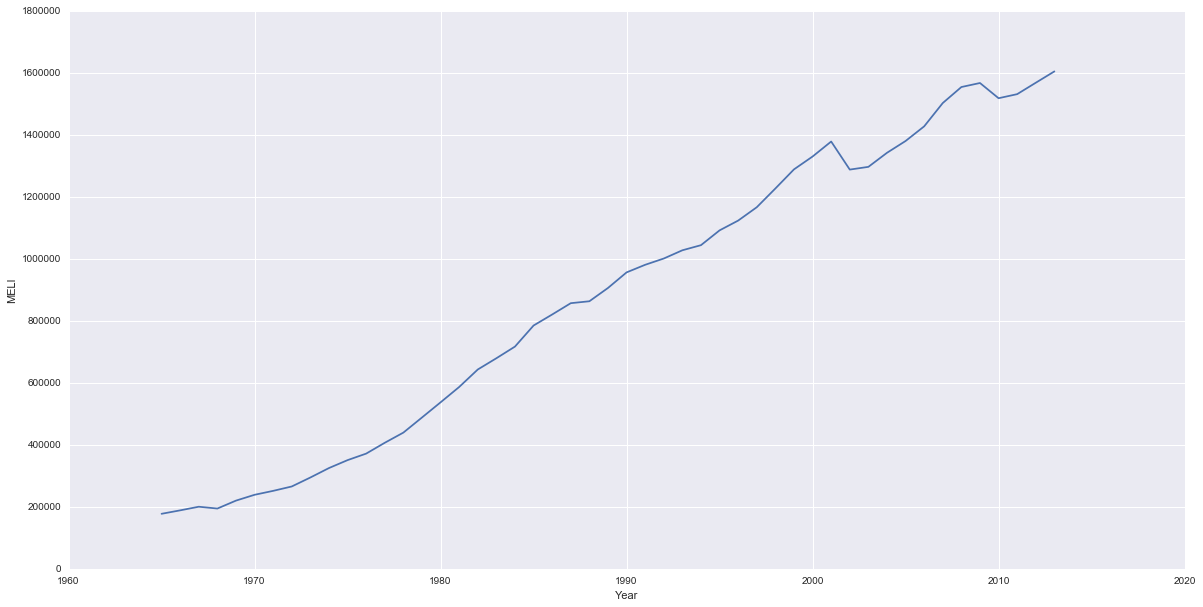

In [75]:
plt.figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
plt.plot(MELI.index, MELI.MELI)
plt.xlabel('Year')
plt.ylabel('MELI')
plt.show()

In [76]:
MELI.to_excel('../output/MELI.xlsx')